In [ ]:
#si vous deposer votre ensemble de donné dabs drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

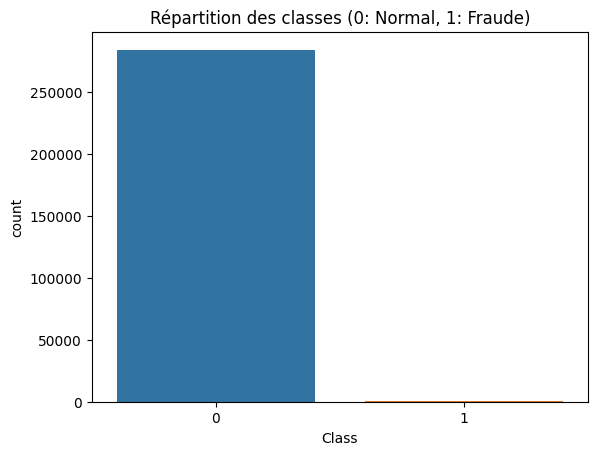

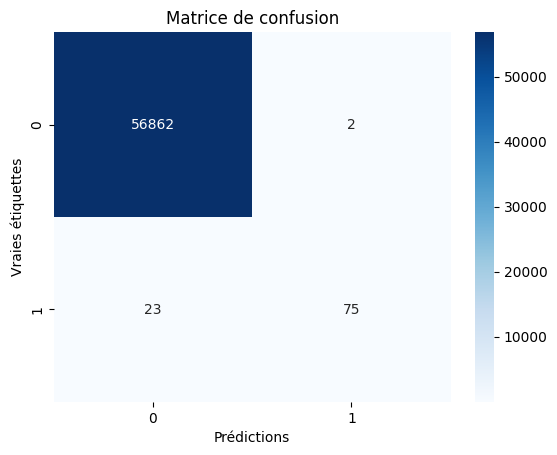

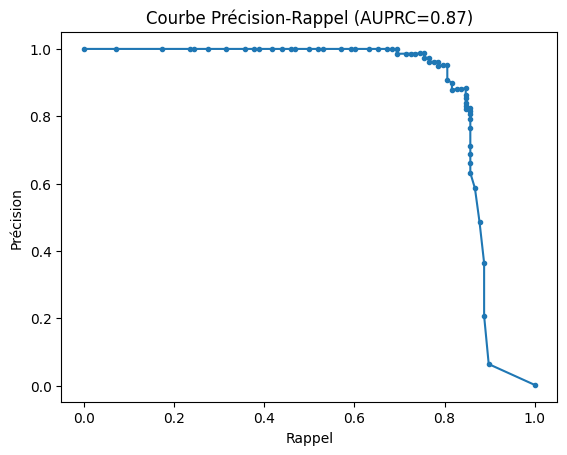

['/content/drive/Shareddrives/Nesrine/Mes_Formations/Portfolio/Machine learning/Detection de fraude/modele_de_fraude_Foret_aleatoire.joblib']

In [ ]:
# Import des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc


# charger le fichier CSV
csv_file_path ="/data/creditcard.csv"
data = pd.read_csv(csv_file_path)

# Visualisation rapide des premières lignes du jeu de données
print(data.head())

# Répartition des classes
frauds = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

print("Nombre de fraudes :", len(frauds))
print("Nombre de transactions normales :", len(normal))

# Visualisation de la distribution des classes
sns.countplot(x='Class', data=data)

plt.title('Répartition des classes (0: Normal, 1: Fraude)')
plt.show()

# Séparation des caractéristiques et de la cible
X = data.drop('Class', axis=1)
y = data['Class']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de forêt aléatoire
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = clf.predict(X_test)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcul de la courbe précision-rappel
precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])
auprc = auc(recall, precision)

# Visualisation de la matrice de confusion
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()

# Visualisation de la courbe précision-rappel
plt.plot(recall, precision, marker='.')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title(f'Courbe Précision-Rappel (AUPRC={auprc:.2f})')
plt.show()

from joblib import dump

# Supposons que votre modèle soit stocké dans la variable 'clf'
# Remplacez 'chemin/vers/votre/modele_de_fraude.joblib' par le chemin de destination souhaité pour votre fichier de modèle.
dump(clf, '/models/modele_de_fraude_Foret_aleatoire.joblib')


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

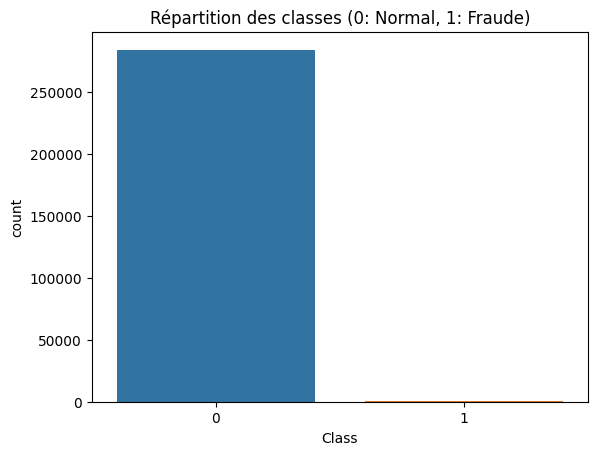

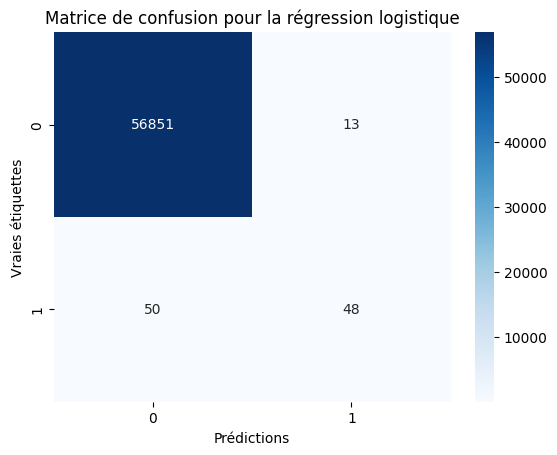

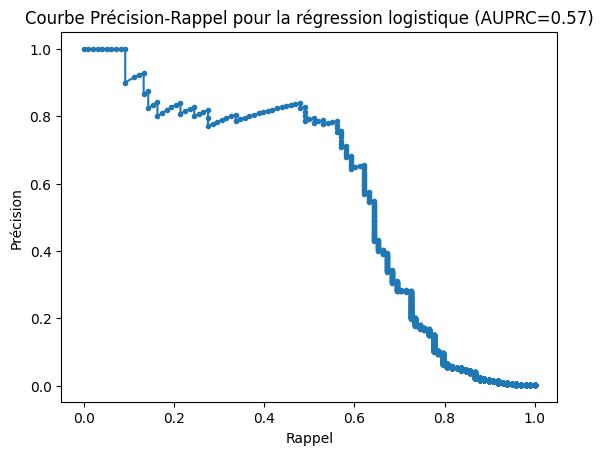

Aire sous la courbe Précision-Rappel (AUPRC) pour la régression logistique : 0.57


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc

# charger le fichier CSV
csv_file_path ="/data/creditcard.csv"
data = pd.read_csv(csv_file_path)

# Visualisation rapide des premières lignes du jeu de données
print(data.head())

# Répartition des classes
frauds = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

print("Nombre de fraudes :", len(frauds))
print("Nombre de transactions normales :", len(normal))

# Visualisation de la distribution des classes
sns.countplot(x='Class', data=data)

plt.title('Répartition des classes (0: Normal, 1: Fraude)')
plt.show()

# Séparation des caractéristiques et de la cible
X = data.drop('Class', axis=1)
y = data['Class']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle de régression logistique
# Vous pouvez spécifier le nombre maximal d'itérations (max_iter) et le solveur ici
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)




# Entraînement du modèle
log_reg.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_log_reg = log_reg.predict(X_test)

# Calcul de la matrice de confusion
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Calcul de la courbe précision-rappel
precision_log_reg, recall_log_reg, _ = precision_recall_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
auprc_log_reg = auc(recall_log_reg, precision_log_reg)

# Affichage de la matrice de confusion
sns.heatmap(conf_matrix_log_reg, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion pour la régression logistique')
plt.show()

# Affichage de la courbe précision-rappel
plt.plot(recall_log_reg, precision_log_reg, marker='.')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title(f'Courbe Précision-Rappel pour la régression logistique (AUPRC={auprc_log_reg:.2f})')
plt.show()

print(f'Aire sous la courbe Précision-Rappel (AUPRC) pour la régression logistique : {auprc_log_reg:.2f}')


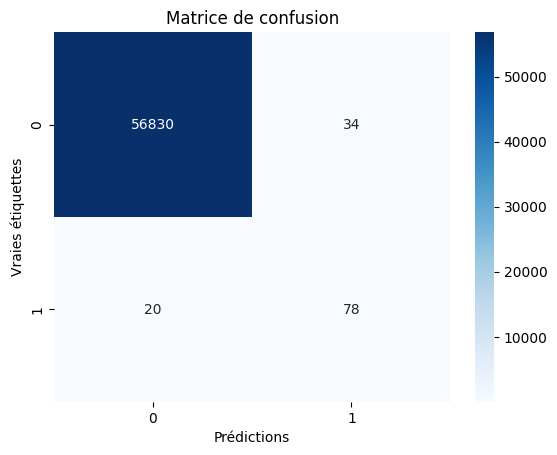

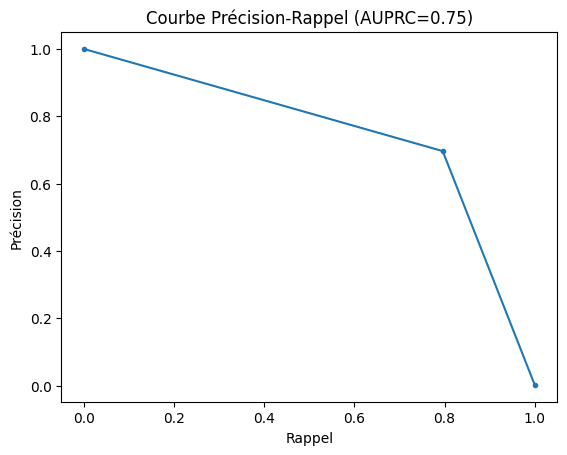

In [ ]:
# Import des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc
import seaborn as sns

# Charger le fichier CSV
csv_file_path ="/data/creditcard.csv"
data = pd.read_csv(csv_file_path)

# Séparation des caractéristiques et de la cible
X = data.drop('Class', axis=1)
y = data['Class']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle d'Arbres de Décision
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = clf.predict(X_test)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcul de la courbe précision-rappel
precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
auprc = auc(recall, precision)

# Visualisation de la matrice de confusion
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()

# Visualisation de la courbe précision-rappel
plt.plot(recall, precision, marker='.')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title(f'Courbe Précision-Rappel (AUPRC={auprc:.2f})')
plt.show()
